### **Customer Churn Prediction using Machine Learning Classification Algorithms**

### Introduction

Churn prediction is a common use case in machine learning domain. If you are not familiar with the term, churn means “leaving the company”. It is very critical for a business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company.

In this project, I will use 'Customer Churn' dataset which is available on [Kaggle](https://www.kaggle.com/ermismbatuhan/digital-marketing-ecommerce-customer-behavior/code). 

This dataset includes data on the service usage habits of a company's customers and tags that indicate whether the relevant customer has left the company. The definition of the columns is as follows:

**Account Length** Information on how many days the user has been a member of the site <br>
**Location Code** User's location code <br>
**User ID** Unique ID assigned to the user <br>
**Credit card info save** Information whether the user has registered the credit card in the system <br>
**Push status** Information whether the user allows notifications or not <br>
**Add to wishlist** Number of times the user has added to the wishlist <br>
**Desktop sessions** Number of user's desktop sessions <br>
**App sessions** Number of user's app sessions <br>
**Desktop transactions** The number of purchases made by the user from the desktop <br>
**Total product detail reviews** Number of product detail views of the user <br>
**Session duration** Average time a user spends in their session <br>
**Promotion clicks** Number of times a user clicks on discount offers <br>
**Avg order value** User's average order amount <br>
**Sale product views** The number of times the user viewed the discounted product <br>
**Discount rate per visited products** Average discount rate of products viewed by the user <br>
**Product detail view per app session** Average number of products that the user viewed details for per session <br>
**App transactions** Number of purchases made by the user through the app <br>
**Add to cart per session** Average user add to cart per session <br>
**Customer service calls** Number of times the user calls customer service <br>
**Churn** Information whether the user is churn | Target Variable


**The project is structured as follows:**
1. Exploratory Data Analysis
2. Data Preprocessing
3. Model Creation and Evaluation
4. Improving the Model

### 1. Exploratory Data Analysis

In [98]:
# import data visualisation libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
filepath = 'E:\Coursera courses\IBM Machine Learning\Course 3 Supervised Classification\data\customer_churn_data.csv'
data = pd.read_csv(filepath, sep=';', decimal=',')

In [100]:
data.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0


In [101]:
# replace spaces in the column headers with _
data.columns = data.columns.str.replace(" ","_")

In [102]:
# changes the categorical columns (push_status and credit_cad_info_save) to binary classification.
for i in data.select_dtypes(include = ['object']).columns.values:
    data[i] = data[i].replace(["yes","no"],[1,0])

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   int64  
 2   user_id                              3333 non-null   int64  
 3   credit_card_info_save                3333 non-null   int64  
 4   push_status                          3333 non-null   int64  
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

In [104]:
data.location_code.value_counts()

415    1655
510     840
408     838
Name: location_code, dtype: int64

In [105]:
# locations_code is a categorical column we will one hot encode
one_hot = pd.get_dummies(data['location_code'], prefix = "_")


In [106]:
one_hot

,__408,__415,__510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [107]:
del data["location_code"]
data = data.join(one_hot)

In [108]:
# check the proportion of churn vs not churn data
data.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [109]:
# The data is skewed at around 85% towards non-churned customers this will be important to remember when model building. 
data.churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

<AxesSubplot:>

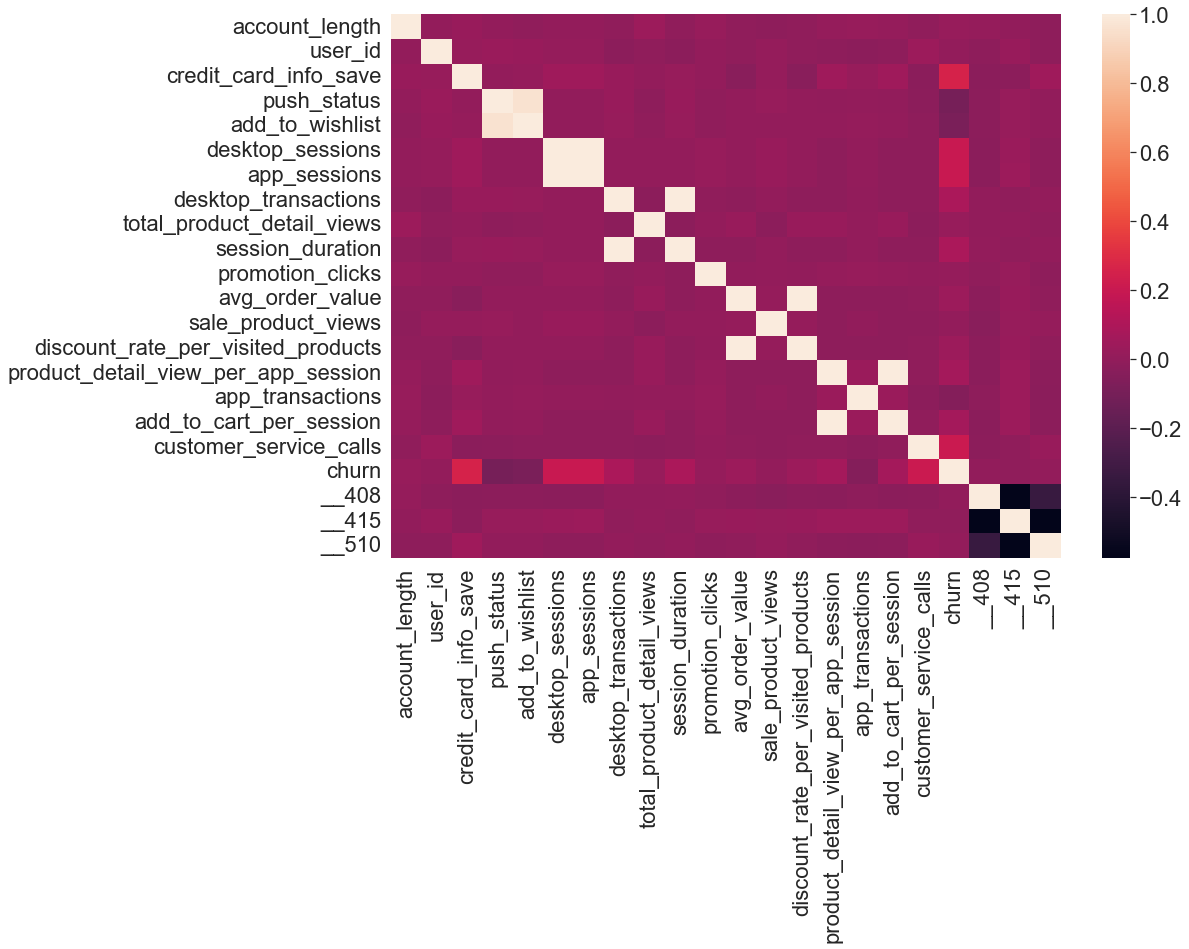

In [110]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data.corr())

In [111]:
# look at the distributon of data in the numeric columns using histograms 
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions','app_sessions', 'desktop_transactions',
                   'total_product_detail_views','session_duration', 'promotion_clicks', 'avg_order_value','sale_product_views',
                   'discount_rate_per_visited_products','product_detail_view_per_app_session', 'app_transactions',
                   'add_to_cart_per_session', 'customer_service_calls']

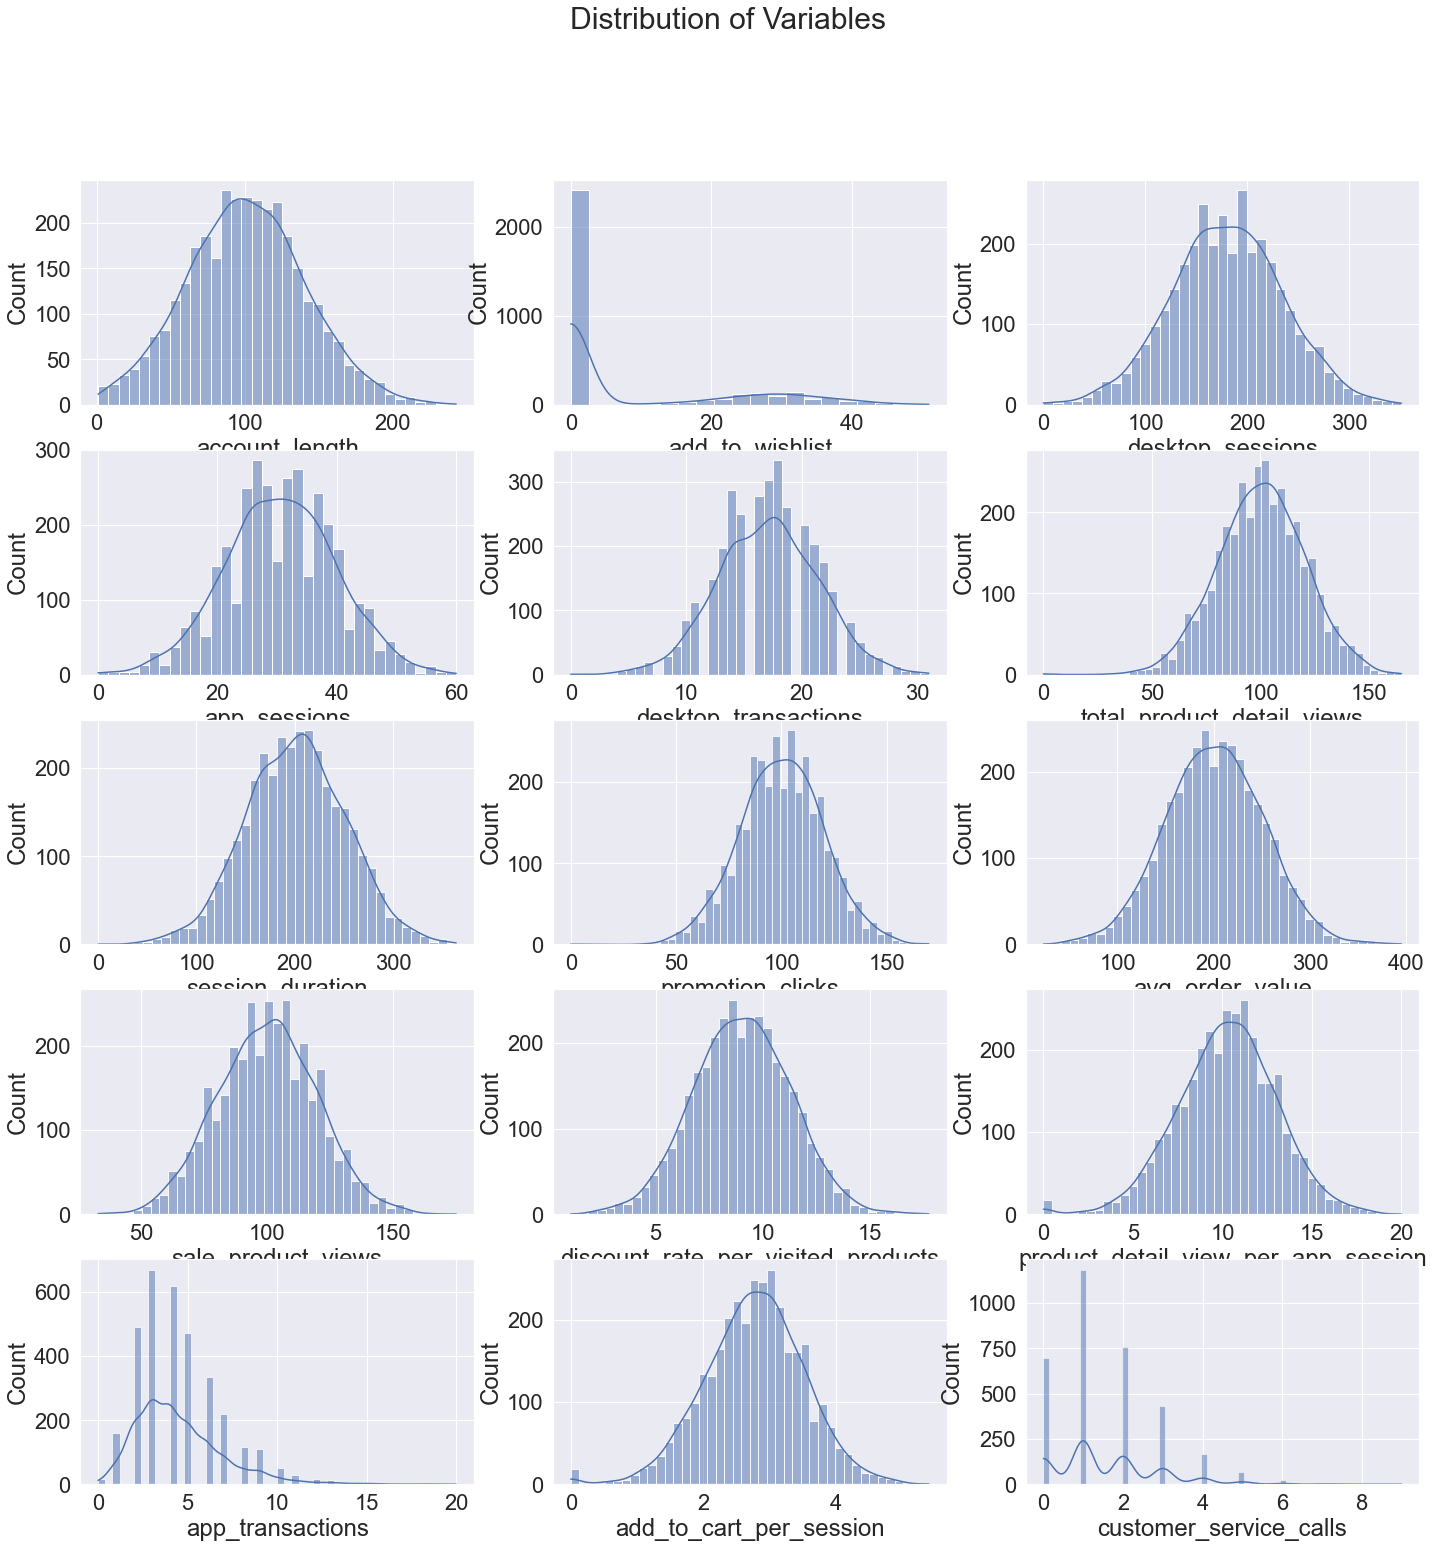

In [112]:
fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of Variables", size=30)

for i in range(5):
    for j in range(3):
        sns.histplot(data[numeric_columns[3*i+j]], ax=axes[i,j], kde=True)

In [113]:
# Create a copy of the original dataframe before scaling
data1 = data.copy()

In [114]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [115]:
for column in [numeric_columns]:
    data[column] = mm.fit_transform(data[column])

In [116]:
# Drop the User_id column as it does not provide any useful information
data.drop(columns="user_id", inplace=True)

In [117]:
round(data.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,0.413,0.165,0.0,0.302,0.413,0.521,1.0
credit_card_info_save,3333.0,0.097,0.296,0.0,0.000,0.000,0.000,1.0
push_status,3333.0,0.277,0.447,0.0,0.000,0.000,1.000,1.0
add_to_wishlist,3333.0,0.159,0.268,0.0,0.000,0.000,0.392,1.0
desktop_sessions,3333.0,0.512,0.155,0.0,0.410,0.510,0.615,1.0
app_sessions,3333.0,0.509,0.154,0.0,0.400,0.517,0.617,1.0
desktop_transactions,3333.0,0.551,0.139,0.0,0.452,0.548,0.645,1.0
total_product_detail_views,3333.0,0.609,0.122,0.0,0.527,0.612,0.691,1.0
session_duration,3333.0,0.552,0.139,0.0,0.459,0.552,0.646,1.0
promotion_clicks,3333.0,0.589,0.117,0.0,0.512,0.588,0.671,1.0


In [118]:
# Save a copy of the processed data for later use
outputfile = 'customer_churndata_processed.csv'
data.to_csv(outputfile, index=False)

In [119]:
data.head()

,account_length,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,...,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn,__408,__415,__510
0,0.524793,0,1,0.490196,0.754986,0.750000,0.548387,0.666667,0.541209,0.511765,...,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0,0,1,0
1,0.438017,0,1,0.509804,0.461538,0.450000,0.548387,0.745455,0.538462,0.605882,...,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0,0,1,0
2,0.561983,0,0,0.000000,0.692308,0.683333,0.322581,0.690909,0.332418,0.647059,...,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0,0,1,0
3,0.342975,1,0,0.000000,0.851852,0.850000,0.161290,0.430303,0.170330,0.517647,...,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0,1,0,0
4,0.305785,1,0,0.000000,0.475783,0.466667,0.419355,0.684848,0.406593,0.717647,...,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0,0,1,0


* Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value). 
* Split the sample into training and test samples, with the test sample representing 40% of observations.


Train-test Split is a technique used to evaluate the performance of a machine learning algorithm
* Train dataset: Used to fit the machine learning model
* Test dataset: Used to evaluate the fit machine learning model
Since we do not have a balanced distribution of churn and not churned data (85% not churned), it is more appropiate to select the stratified train-test split method to preserve the same proportions of the values of each classes in the original dataset.

In [120]:
X = data.drop(columns='churn')
X_features = X.columns.tolist()


In [121]:
# Train_test split
from sklearn.model_selection import StratifiedShuffleSplit


# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[X_features], data.churn))

# Create the dataframes
X_train = data.loc[train_idx, X_features]
y_train = data.loc[train_idx, 'churn']

X_test  = data.loc[test_idx, X_features]
y_test  = data.loc[test_idx, 'churn']

In [122]:
y_train.value_counts(normalize=True)

0    0.855122
1    0.144878
Name: churn, dtype: float64

In [123]:
y_test.value_counts(normalize=True)

0    0.855
1    0.145
Name: churn, dtype: float64

We can see with the stratified split, we maintain the proportion of churned (15%) and not churned (85%) classes from the original dataset.

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [124]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [125]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

C:\Users\b5-chen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [126]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [127]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [128]:
# predicted values from each model
y_pred.apply(pd.Series.value_counts)

,lr,l1,l2
0,959,939,932
1,41,61,68


In [129]:
y_prob.head()

,lr,l1,l2
0,0.834418,0.873373,0.867699
1,0.644187,0.672452,0.674143
2,0.957686,0.974212,0.981725
3,0.778044,0.760569,0.789616
4,0.875675,0.879989,0.871153


In [130]:
y_pred[y_pred.lr != y_pred.l1].value_counts()
# as you can see when regularisation is applied to the model, more churns are predicted.

lr  l1  l2
0   1   1     21
1   0   0      1
dtype: int64

In [131]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [132]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [133]:
metrics

,lr,l1,l2
precision,0.836428,0.838037,0.847019
recall,0.864000,0.864000,0.869000
fscore,0.829877,0.839456,0.848144
accuracy,0.864000,0.864000,0.869000
auc,0.576850,0.605485,0.625590


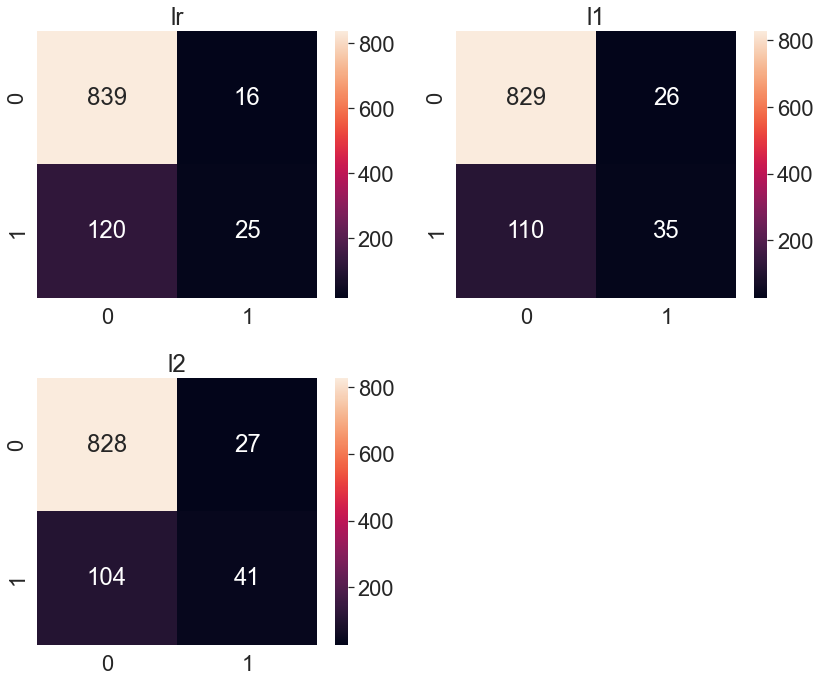

In [134]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    sns.set(font_scale=2);
    
plt.tight_layout()

K Nearest Neighbours Model building
* Estimate a K-Nearest Neighbors model, using K=5.
* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
* Use a graphic to illustrate the Confusion Matrix 

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [149]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       855
           1       0.75      0.31      0.44       145

    accuracy                           0.89      1000
   macro avg       0.82      0.65      0.69      1000
weighted avg       0.87      0.89      0.86      1000

Accuracy score:  0.88
F1 Score:  0.44


Text(0.5, 76.5, 'Ground Truth')

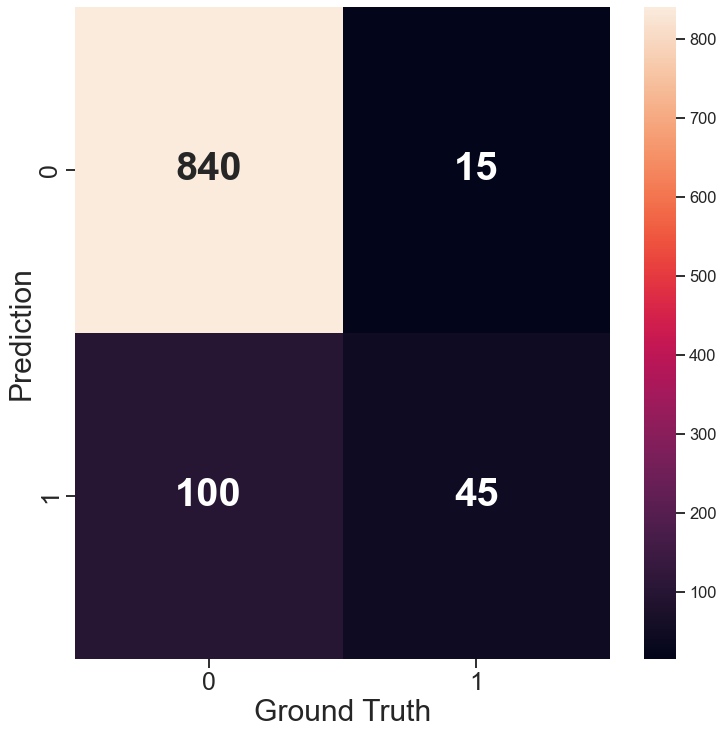

In [150]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

Model Evaluation
* To determine the right value for K, examing results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy)
* Generate charts which plot each of these measures as a function of K.

In [138]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

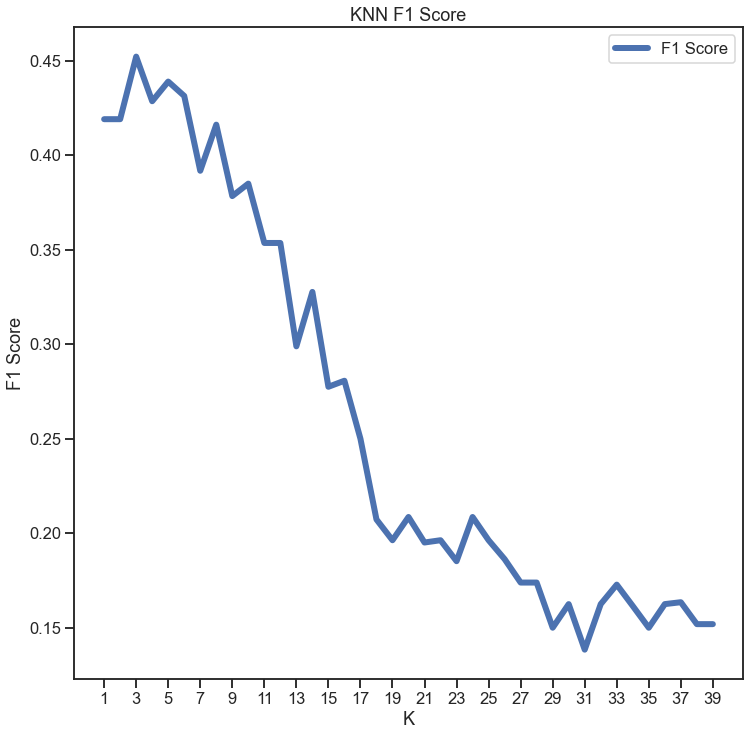

In [139]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')

Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1800x1200 with 0 Axes>

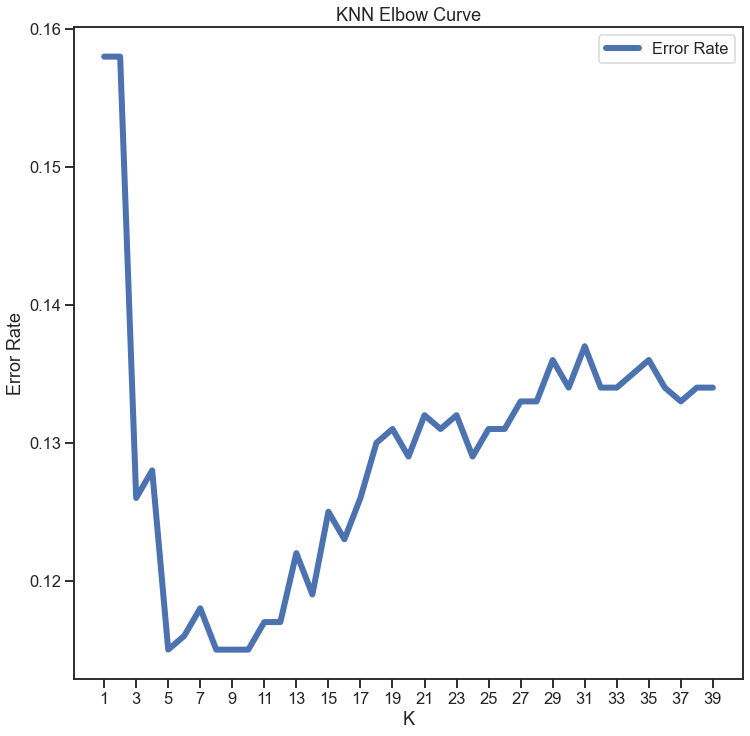

In [140]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

### GradientBoosting model 
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.


In [141]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200]
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4, 6]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [142]:
# The best model
GV_GBC.best_estimator_.n_estimators

200

In [143]:
y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       878
           1       0.74      0.89      0.81       122

    accuracy                           0.95      1000
   macro avg       0.86      0.92      0.89      1000
weighted avg       0.95      0.95      0.95      1000



Text(0.5, 76.5, 'Ground Truth')

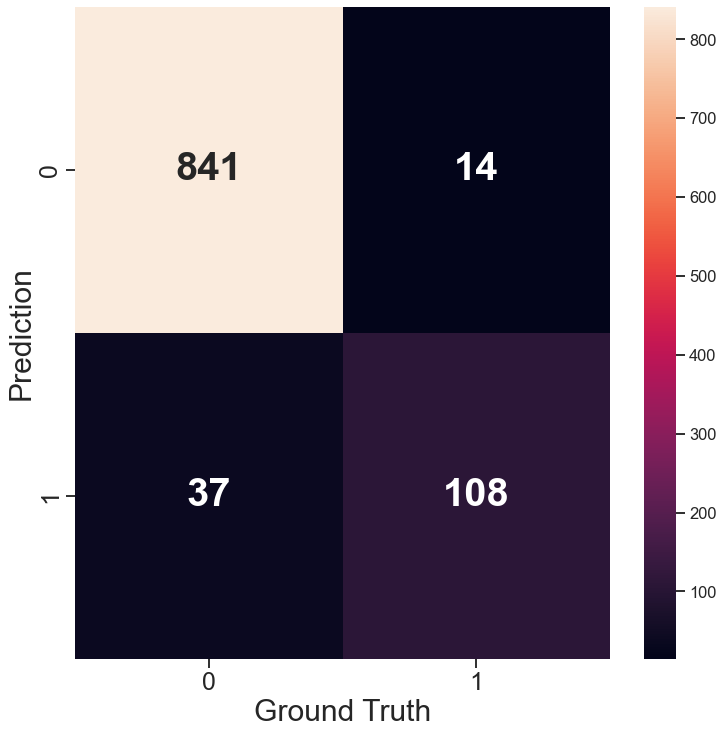

In [144]:
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)